# Missing Migrants Analysis
### Colleen Dunlap
This notebook takes information from the Missing Migrants Dataset to predict the severity of incidents during migration, in terms of death toll and number of missing migrants.  My hope is that the insights from this project will advise Humanitarian Organizations and help them better mobilize to prevent migrant loss.

The dataset for this project was pulled from Kaggle at https://www.kaggle.com/snocco/missing-migrants-project 

For more information on the Missing Migrants Project, please visit 
https://missingmigrants.iom.int/ 

In [0]:
# import our necessary packages and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from google.colab import drive
from datetime import datetime 
import seaborn as sns
from scipy import stats



In [4]:
#comment out if NOT using Google CoLab
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


### Import the Missing Migrants dataset (.csv file) and store in a dataframe

In [5]:
#we have 5,332 records.  Not quite a huge dataset, but definitely enough to explore and notice some trends
#change filepath as necessary
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MissingMigrants.csv')
df.head(10)
#df.iloc[:,0]


,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51591,Mediterranean,"March 28, 2019",2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,"March 25, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3
5,51580,US-Mexico Border,"March 23, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Unknown (skeletal remains),"Pima County jurisdiction, Arizona, USA",Pima County Office of the Medical Examiner,"32.057499000000, -111.666072500000",NaN,http://www.humaneborders.info/,Northern America,5
6,51581,US-Mexico Border,"March 23, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Unknown (skeletal remains),"Pima County jurisdiction, Arizona, USA",Pima County Office of the Medical Examiner,"32.057499000000, -111.666072500000",NaN,http://www.humaneborders.info/,Northern America,5
7,51585,Southeast Asia,"March 23, 2019",2019,Mar,8.0,2.0,10,NaN,1.0,NaN,NaN,Vehicle Accident,"Sa Setthi intersection in Tambon Ban Mai, Tha ...","The Nation, Vietnam+","13.865704814542, 99.587248723929",NaN,"http://bit.ly/2YqrMsT, http://bit.ly/2TzbavA",South-eastern Asia,3
8,51586,Mediterranean,"March 23, 2019",2019,Mar,4.0,4.0,8,NaN,3.0,5.0,NaN,Presumed drowning,"Off the coast of Sfax, Tunisia","Shems FM, Tunisie Numérique, Kapitalis","35.317034468315, 11.078928258810",Central Mediterranean,"http://bit.ly/2U1K4C4, http://bit.ly/2HJW70B, ...",Uncategorized,3
9,51578,US-Mexico Border,"March 21, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Unknown (skeletal remains),"Pima County jurisdiction, Arizona, USA",Pima County Office of the Medical Examiner,"32.057499000000, -111.666072500000",NaN,http://www.humaneborders.info/,Northern America,5


# Part 1: Data Visualization
  1. Assign index variables for program readability of code
  2. Plot relationship between Number of Females and Number of Children
  3. Plot the Total Dead and Missing versus

      a. Time

      b. Year

      c. Month
  4. Plot Total Dead and Missing versus Region of Incident
  5. Plot Total Dead and Missing versus Latitude versus Longitude


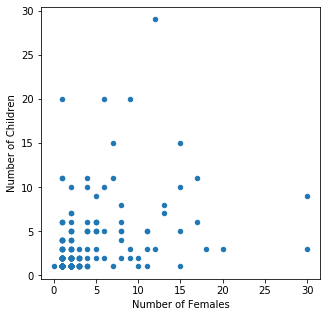

In [6]:
iWebID = 0;
iRegion = 1;
iDate = 2;
iYear = 3;
iMonth = 4;
iNumDead = 5;
iNumMissing = 6;
iTotalDeadMissing = 7;
iNumSurvivors = 8;
iNumFemales = 9;
iNumMales = 10;
iNumChildren = 11;
iCause = 12;
iLocation = 13;
iSource = 14;
iLatLon = 15;
iRoute = 16;
iURL = 17;
iUNSD = 18;
iSourceQuality = 19;

df.plot.scatter('Number of Females','Number of Children', figsize=(5,5)) 
plt.show()

In [0]:
import seaborn as sns

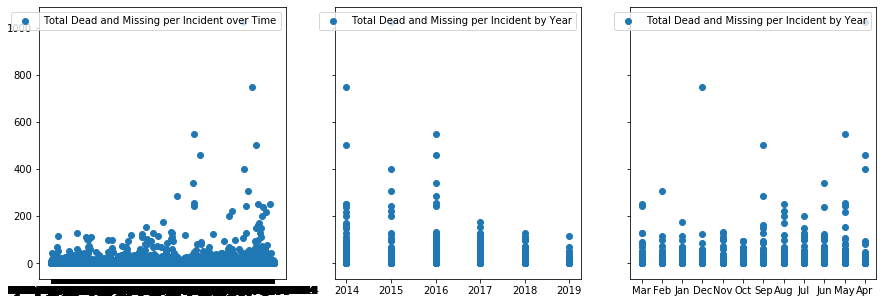

In [8]:
fig, ax = plt.subplots(1, 3,figsize=(15,5), sharey=True)
ax[0].scatter(df.iloc[:,iDate], df.iloc[:,iTotalDeadMissing],  label="Total Dead and Missing per Incident over Time")
ax[0].legend()

ax[1].scatter(df.iloc[:,iYear], df.iloc[:,iTotalDeadMissing],  label="Total Dead and Missing per Incident by Year")
ax[1].legend()

ax[2].scatter(df.iloc[:,iMonth], df.iloc[:,iTotalDeadMissing],  label="Total Dead and Missing per Incident by Year")
ax[2].legend()

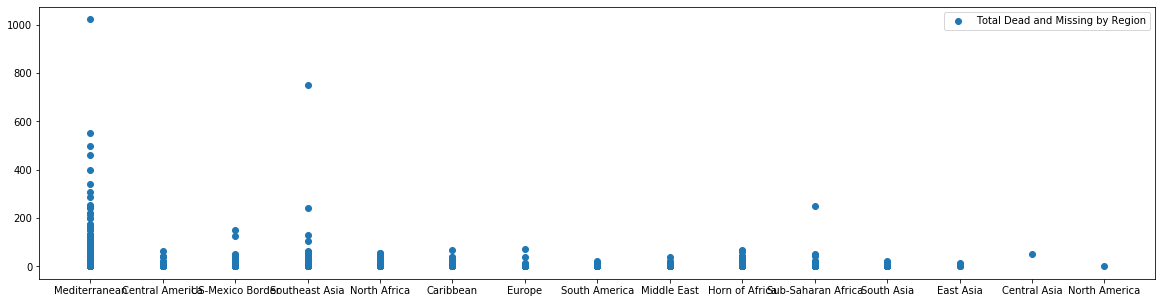

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter(df.iloc[:,iRegion], df.iloc[:,iTotalDeadMissing],  label="Total Dead and Missing by Region")
ax.legend()
plt.show()

In [10]:
lat = []
lon = []
hue = []
goodrows = df['Total Dead and Missing']>0
#creat a latitute and longitude list
for iCord in range(len(df.loc[goodrows,'Location Coordinates'])):
  #print(iCord)
  #totalDM = df.iloc[iCord:, iTotalDeadMissing]
  if (isinstance(df.iloc[iCord,iLatLon], str) is False):
    y = 0;
    x = 0;
  else:
    y = (float)(df.iloc[iCord,iLatLon].split(',')[0])
    x = (float)(df.iloc[iCord,iLatLon].split(',')[1])
  #if totalDM<1:
    #hue.append()
  lat.append(y)
  lon.append(x)

print("We Done")

We Done


# Part 3 Data Cleaning
1. Convert Location Column to Two Columns for Latitude and Longitude Data
2. Remove rows with NaN
3. Filter out outliers (Top 2% of data)

1
5214
5214


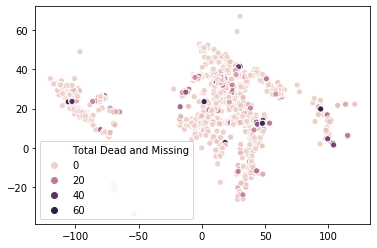

In [11]:
#find rows where total dead and missing is greater than one
goodrows = df['Total Dead and Missing']>0
modeldf = df.loc[goodrows,:]
#of those rows, find the minimum number of dead and missing (should be greater than one)
print(df.loc[goodrows,'Total Dead and Missing'].min())
q = df.loc[goodrows,'Total Dead and Missing'].quantile(0.98)#remove top 2% as outliers
#set to a newdf we will use for visualization, preserving original dataframe for training
newdf =df.loc[goodrows][df.loc[goodrows,'Total Dead and Missing'] < q]


lat4viz = [];
lon4viz = [];
for iCord in range(len(newdf.iloc[:,iLatLon])):
  if (isinstance(newdf.iloc[iCord,iLatLon], str) is False):
    y = 0;
    x = 0;
  else:
    y = (float)(newdf.iloc[iCord,iLatLon].split(',')[0])
    x = (float)(newdf.iloc[iCord,iLatLon].split(',')[1])
  lat4viz.append(y)
  lon4viz.append(x)
print(len(newdf))
print(len(lon4viz))
sns.scatterplot( x=lon4viz, y=lat4viz, data=newdf, hue='Total Dead and Missing')

# 1. Predicting Dead and Missing Number
Features:
1. Region
3. Month
4. Year
5. Latitude
6. Longitude

(Future Work) Also Explore:
  1. Migration Route
  2. Cause of Death
  2. Number of Males
  3. Number of Females
  4. Number of Children

# Part 4 Prepare Data for Model
1. Separate input and output data. 
2.  Convert region to an integer. 
3. Convert month from string to integer 
4. Scale features and output to be between 0 and 1

In [12]:
modeldf.head(10)
from time import strptime
#q = modeldf.loc[:,'Total Dead and Missing'].quantile(0.98)#remove top 2% as outliers
#set to a newdf we will use for visualization, preserving original dataframe for training
#modeldf =modeldf[modeldf.loc[:,'Total Dead and Missing'] < q]
#strptime('Feb','%b').tm_mon
X = newdf.iloc[:,[1,3,4]]
#X.head(5)
X['Latitude'] = lat4viz
X['Longitude'] = lon4viz
for iReg in range(len(X)):
  X.iloc[iReg,0] = sum(map(ord, X.iloc[iReg,0]))
  X.iloc[iReg,2] = strptime(X.iloc[iReg,2],'%b').tm_mon
#X.head(5)
print(len(X))
Y = newdf.iloc[:,iTotalDeadMissing]
X -= X.min()  # equivalent to df = df - df.min()

X /= X.max() 
Y -= Y.min()  # equivalent to df = df - df.min()

Y /= Y.max() 
X = X.dropna()
print(len(X))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

5214
5214


#

# Part 5 Split Testing and Train Data
90% Train, 10% Test

In [13]:
lenTrain = (int)(len(X)*.9)
scaledXTrain = X[0:lenTrain];
scaledXTest = X[lenTrain:len(X)];
scaledYTrain = Y[0:lenTrain];
scaledYTest = Y[lenTrain:len(Y)];
scaledXTrain

,Region of Incident,Reported Year,Reported Month,Latitude,Longitude
0,0.694686,1.0,0.181818,0.715597,0.606040
1,0.694686,1.0,0.181818,0.726345,0.606897
2,0.694686,1.0,0.181818,0.690803,0.475047
3,0.694686,1.0,0.181818,0.688446,0.475327
4,0.783575,1.0,0.181818,0.526166,0.089632
...,...,...,...,...,...
4767,0.811594,0.2,0.636364,0.648488,0.032022
4768,0.495652,0.2,0.636364,0.487846,0.515444
4769,0.495652,0.2,0.636364,0.462942,0.623272
4770,0.495652,0.2,0.636364,0.549574,0.625073


#Part 6 Design Model
  1. Add Dense Layer with 5 inputs, activation Relu
  2. Add another Dense Layer, activation Relu
  3. Add Dropout Layer for preventing Overfitting
  4. Add Sigmoid Output Layer

In [14]:
from keras.layers import Dropout
np.random.seed(9)
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1, activation='sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#Part 7
Compile Mode.  Adjust learning rate.  Use Mean Squared Error as loss fuction, opt as optimizer, and track accuracy metric.  I chose to use Mean Squared Error for the loss function as the result of this model is numeric, not categorical, and Mean Squared Error performed better than other options (e.g. hinge).  The optimizer was also chosen based on experimentation and performance.  SGD was used to tweak the learning rate, so as to not overshoot the minimum of the cost function.

In [15]:
from keras.optimizers import SGD
from keras import losses
opt = SGD(lr=0.0001)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])


# Part 8 Train Model
100 epochs, 100 steps per epoch

In [16]:

hist = model.fit(scaledXTrain, scaledYTrain, epochs=100, steps_per_epoch=100, validation_data = (scaledXTest, scaledYTest),
                        validation_steps = 100)




Train on 4692 samples, validate on 522 samples
Epoch 1/100





100/100 [==============================] - 1s 13ms/step - loss: 0.1954 - acc: 0.5881 - val_loss: 0.1923 - val_acc: 0.6590
Epoch 2/100
100/100 [==============================] - 1s 5ms/step - loss: 0.1940 - acc: 0.5919 - val_loss: 0.1912 - val_acc: 0.6628
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1926 - acc: 0.5952 - val_loss: 0.1902 - val_acc: 0.6743
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1913 - acc: 0.5983 - val_loss: 0.1892 - val_acc: 0.6743
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1900 - acc: 0.6007 - val_loss: 0.1882 - val_acc: 0.6743
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1886 - acc: 0.6033 - val_loss: 0.1872 - val_acc: 0.6743
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1873 - acc: 0.6050 - val_loss: 0.1863 - val_acc: 0.6743
Epoch 8/100
1

# Finally, Evaluate the model

Evaluate Model on the Test set

In [17]:
scores = model.evaluate(scaledXTest, scaledYTest)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

522/522 [==============================] - 0s 29us/step

acc: 67.62%


Plot the Accuracy over time

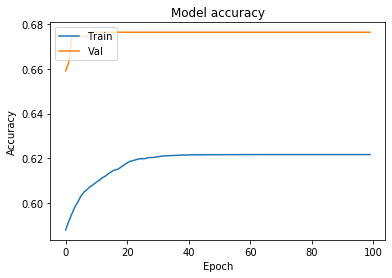

In [18]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

Plot the Loss over time

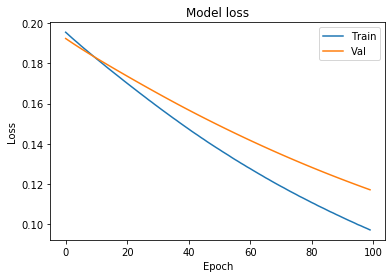

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Evaluation of Results
This model has about a 67% validation accuracy and about a 62% training accuracy.  The validation loss is about .09 and the training loss is about .06.  These numbers aren't the best, but I think that they're promising for the unclean/semi-structured/incomplete data in this dataset.

  Overall, considerations like month and year can be indicators of migration rates, however, things like cartel violence, war, or natural disasters can spur immigration at much larger rates than the features that were provided in this set.  Therefore, this model can be improved by expanding the dataset to include information on violent conflicts, natural disasters, etc.

# References
1. Keras Losses Documentation https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/ 
2. Missing Migrants Project https://missingmigrants.iom.int/ 
3. Missing Migrants Dataset https://www.kaggle.com/snocco/missing-migrants-project
4. Deep Learning: Which Loss and Activation Functions Should I Use? https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8 
